In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
%matplotlib inline

In [2]:
!ls ../../datasets/*.pickle

../../datasets/df_all_2016.pickle
../../datasets/df_all_comments_parsed_2016.pickle
../../datasets/possible_botfights.pickle


In [3]:
with open("../../datasets/df_all_comments_parsed_2016.pickle", "rb") as f:
    df_all = pickle.load(f)

### Descriptive statistics across all languages

In [4]:
df_all.query("page_namespace == 0")['time_to_revert_days'].describe()

count    561195.000000
mean        236.763481
std         409.359131
min           0.000012
25%           6.110828
50%          61.923218
75%         289.457402
max        4823.938021
Name: time_to_revert_days, dtype: float64

In [5]:
df_all.query("time_to_revert_days < 0").groupby("language")['time_to_revert_days'].count()

Series([], Name: time_to_revert_days, dtype: int64)

### Mean & median time to revert by languages

In [6]:
ns0_gb_language = df_all.query("page_namespace == 0").groupby("language")
ns0_gb_language['time_to_revert_days'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
de,54907.0,177.256633,323.345154,0.000012,3.369433,29.807153,210.348044,2812.659664
en,244399.0,354.050681,502.663082,0.000012,16.877679,138.318808,505.974890,4823.938021
es,67980.0,150.104211,275.397183,0.000023,4.481791,47.547847,172.917746,2727.134711
fr,56255.0,121.746614,282.003182,0.000023,2.935179,21.367500,82.701192,2862.087998
ja,34604.0,107.450039,253.000806,0.000231,1.897529,13.455127,80.502080,2850.540775
pt,60035.0,177.773675,338.065194,0.000023,6.676771,56.883611,135.026256,2798.985463
zh,43015.0,120.061275,196.409893,0.000116,4.885318,32.900625,213.027598,2869.869861


### Median time to revert by languages by year

In [7]:
ns0_gb_language_year = df_all.query("page_namespace == 0").groupby(["language", "reverting_year"])
ns0_gb_language_year['time_to_revert_days'].median().unstack()

reverting_year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
language,,,,,,,,,,,,,
de,2.439618,6.287488,12.742436,8.252627,11.230156,14.630139,6.217743,7.707627,5.969780,279.502292,189.267894,575.239363,791.212373
en,63.480868,10.203275,12.095544,13.318663,26.052465,79.020104,40.778594,37.459572,14.168519,300.271094,266.494740,201.227841,303.339485
es,NaN,5.375266,9.429537,11.184734,14.064867,6.993437,2.047315,61.636123,7.451910,175.878571,234.881152,325.514109,473.861042
fr,9.640359,5.506470,13.408519,7.898646,12.524988,10.906146,8.909699,20.092894,6.198200,150.262350,609.872124,43.618009,167.325000
ja,3.662130,9.422280,17.108843,8.956308,10.870405,8.286950,7.932205,5.906661,6.568229,232.283553,155.465810,28.741464,15.254803
pt,9.191991,5.794606,23.212772,38.849572,16.081863,46.262870,8.320255,60.851499,7.508027,78.069688,273.977500,498.165880,841.094109
zh,14.220000,27.748524,10.916933,7.685845,12.490764,9.794954,8.918437,4.885150,6.302905,174.916956,273.386863,30.850069,299.686412


### Time to revert histogram and KDE for enwiki ns0

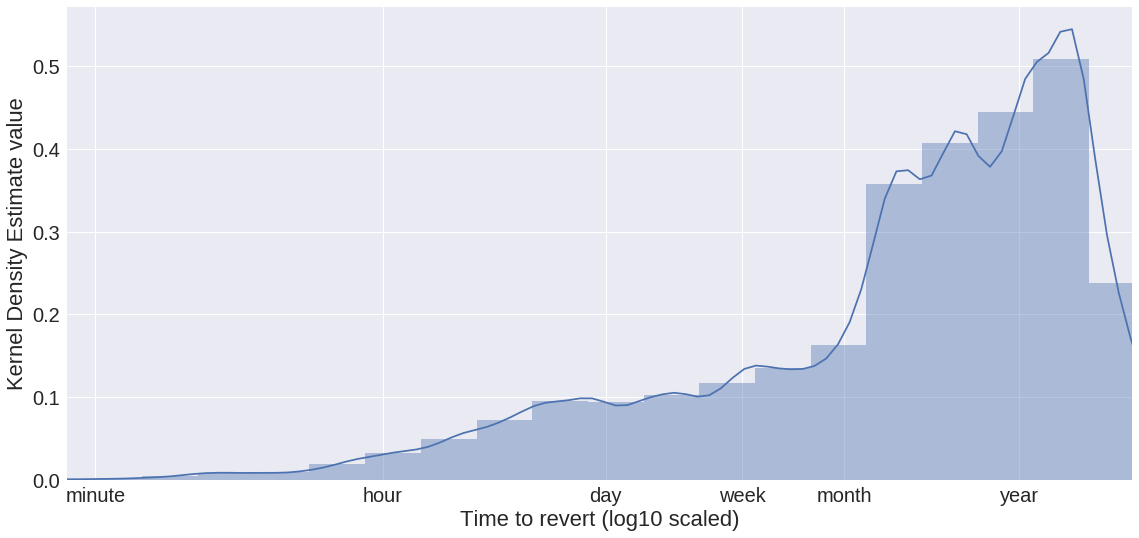

In [8]:
sns.set(font_scale=2)

g = sns.FacetGrid(df_all.query("page_namespace == 0 and language == 'en'"), size=8, aspect=2)
g.map(sns.distplot, "time_to_revert_hrs_log10", bins=25)

g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

g.ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

g.ax.set_ylabel("Kernel Density Estimate value")
g.ax.set_xlabel("Time to revert (log10 scaled)")

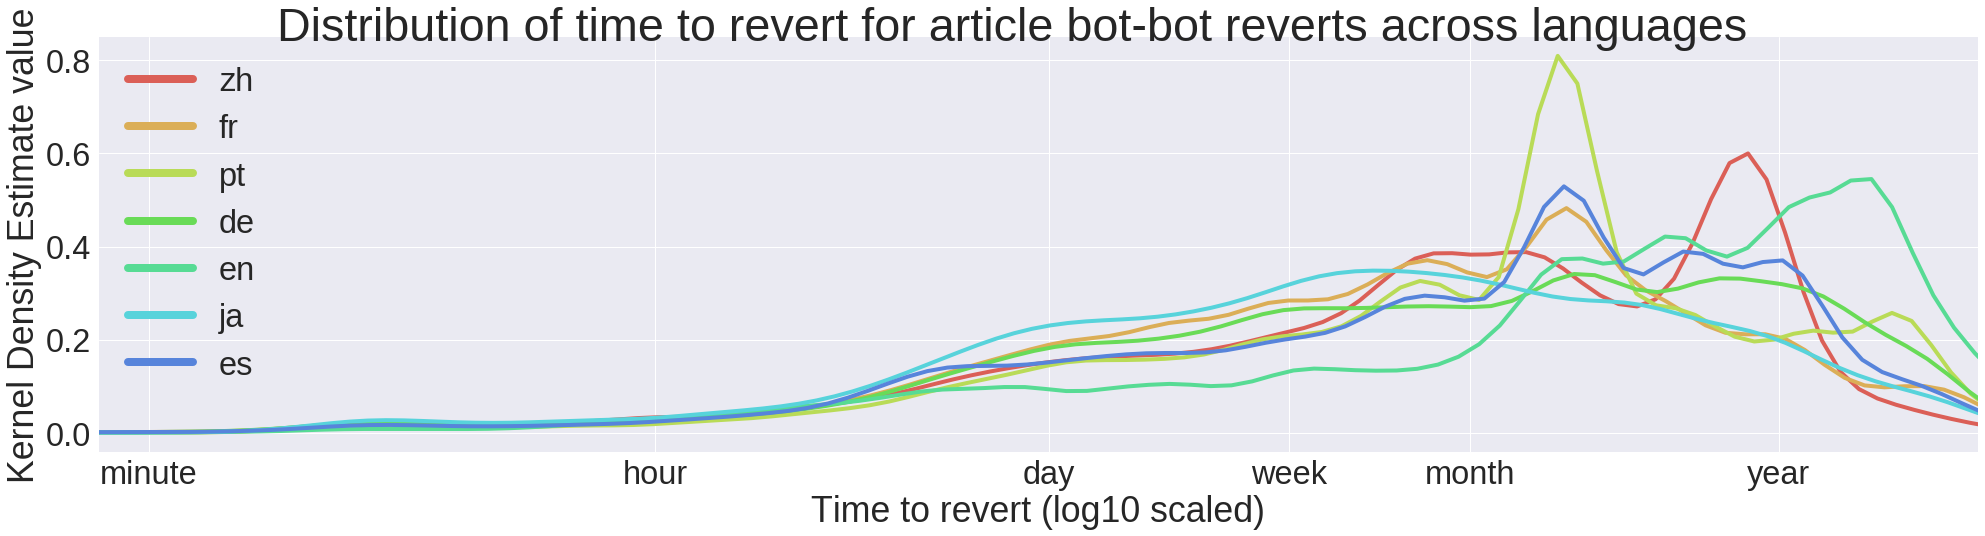

In [9]:
sns.set(font_scale=3.25, rc={'lines.linewidth': 4})
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0"), palette=pal, hue="language", size=8, aspect=3.5)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

g.ax.set_ylabel("Kernel Density Estimate value")
g.ax.set_xlabel("Time to revert (log10 scaled)")
plt.suptitle("Distribution of time to revert for article bot-bot reverts across languages")

g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

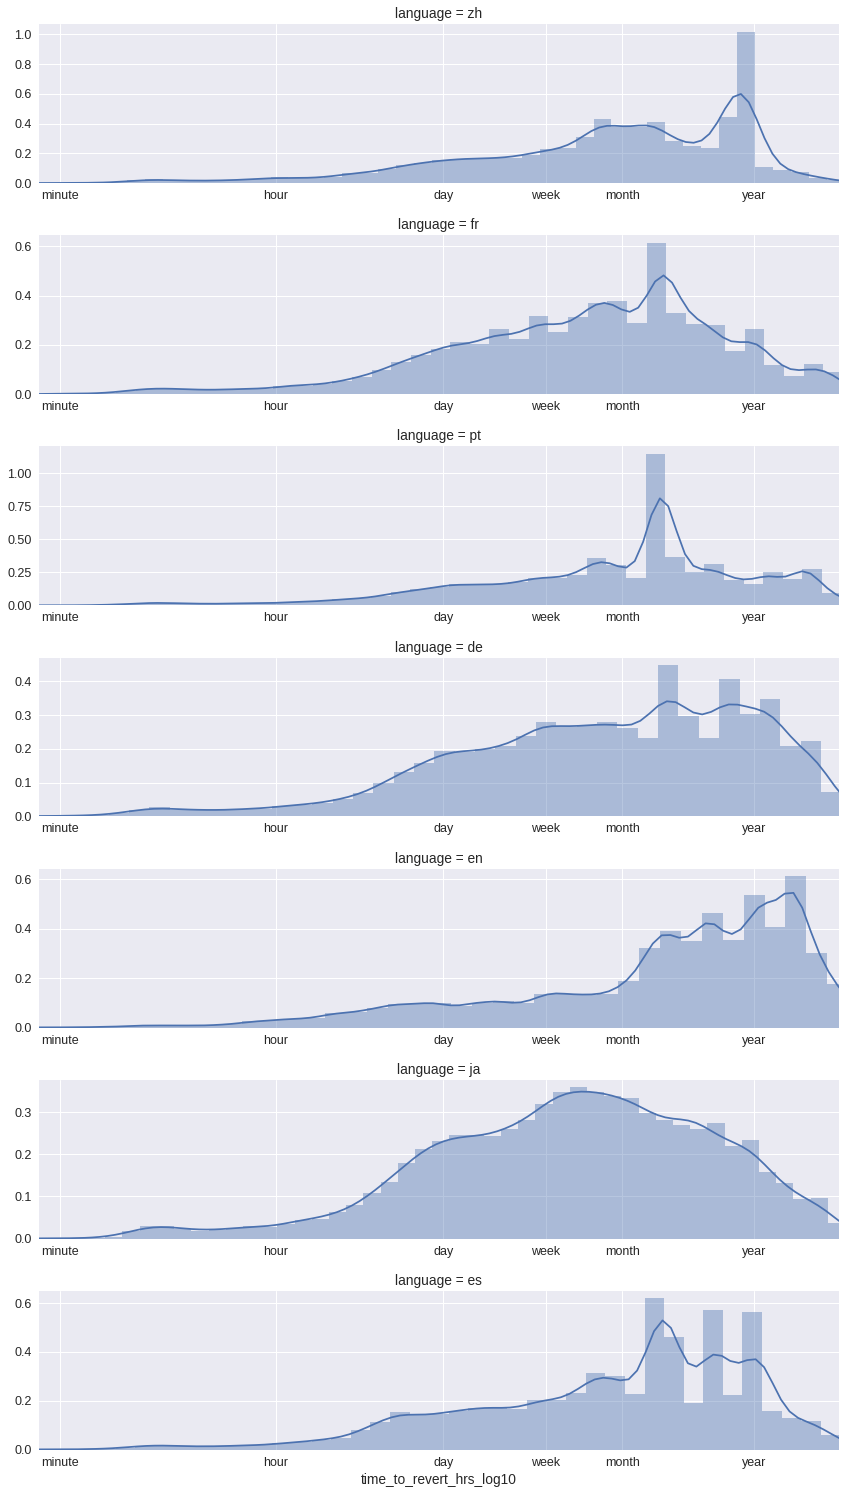

In [13]:
sns.set(font_scale=1.25)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, row="language", size=3, aspect=4, sharex=False, sharey=False)
g.map(sns.distplot, "time_to_revert_hrs_log10")

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlim(np.log10(1/90), np.log10(24*365*5))
    

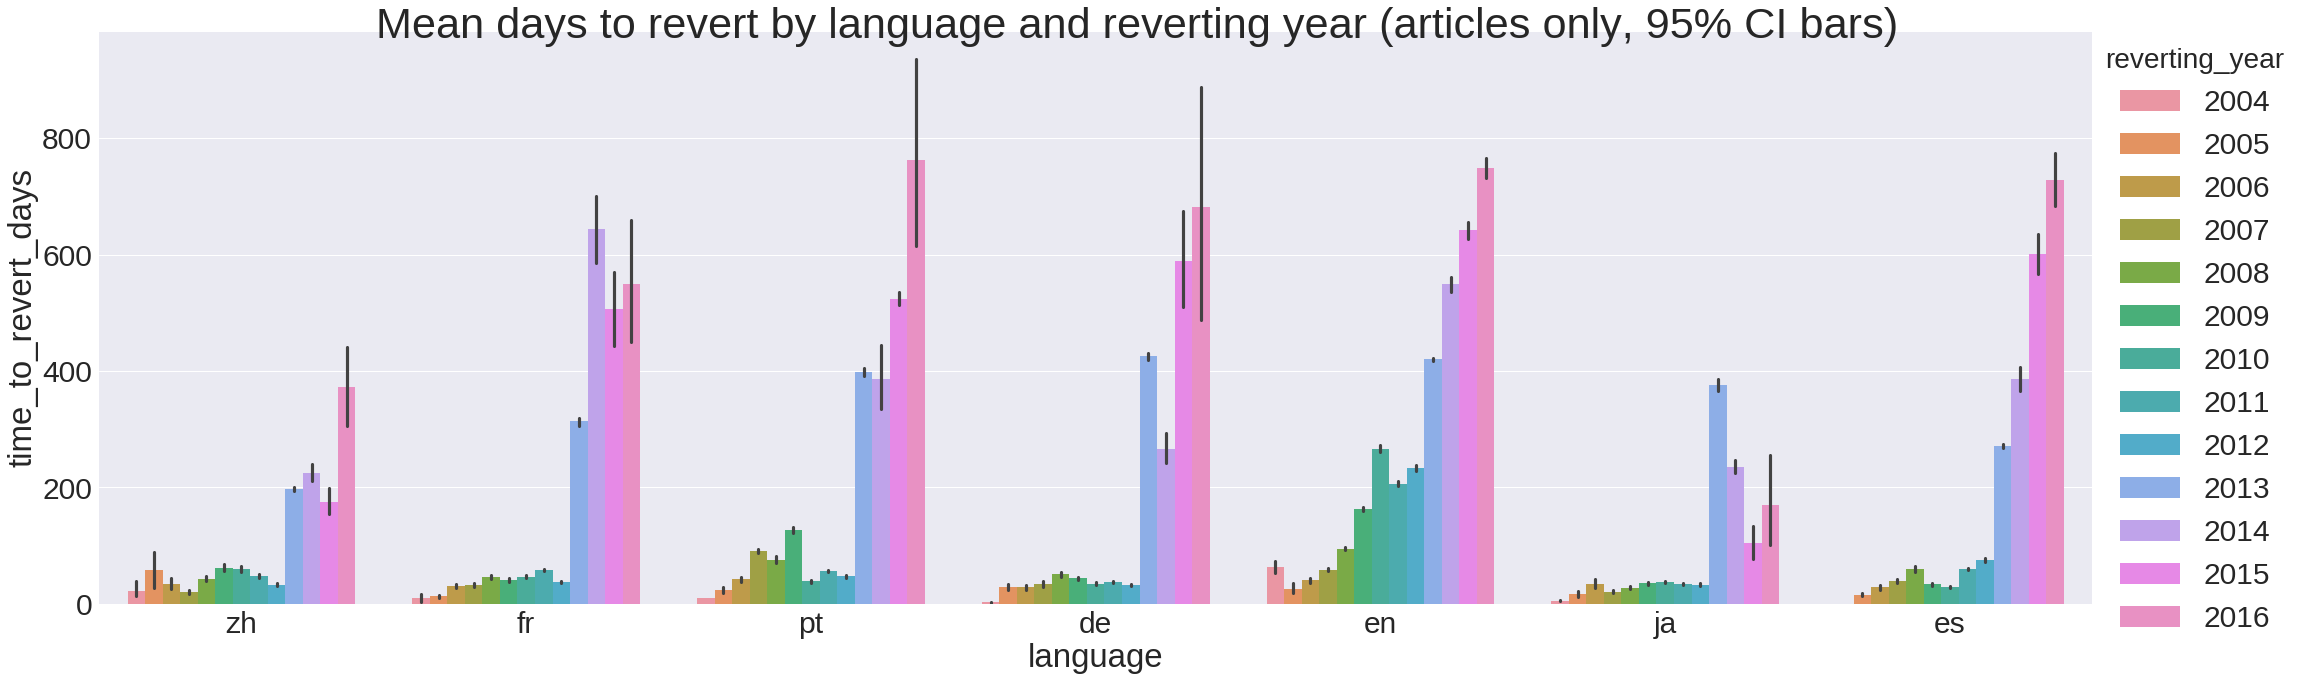

In [14]:
sns.set(font_scale=3)

g = sns.factorplot(data=df_all[df_all['page_namespace']==0],
                   x='language',
                   y='time_to_revert_days',
                   hue='reverting_year',
                   kind='bar',
                   size=10,
                   aspect = 3)

plt.suptitle("Mean days to revert by language and reverting year (articles only, 95% CI bars)")

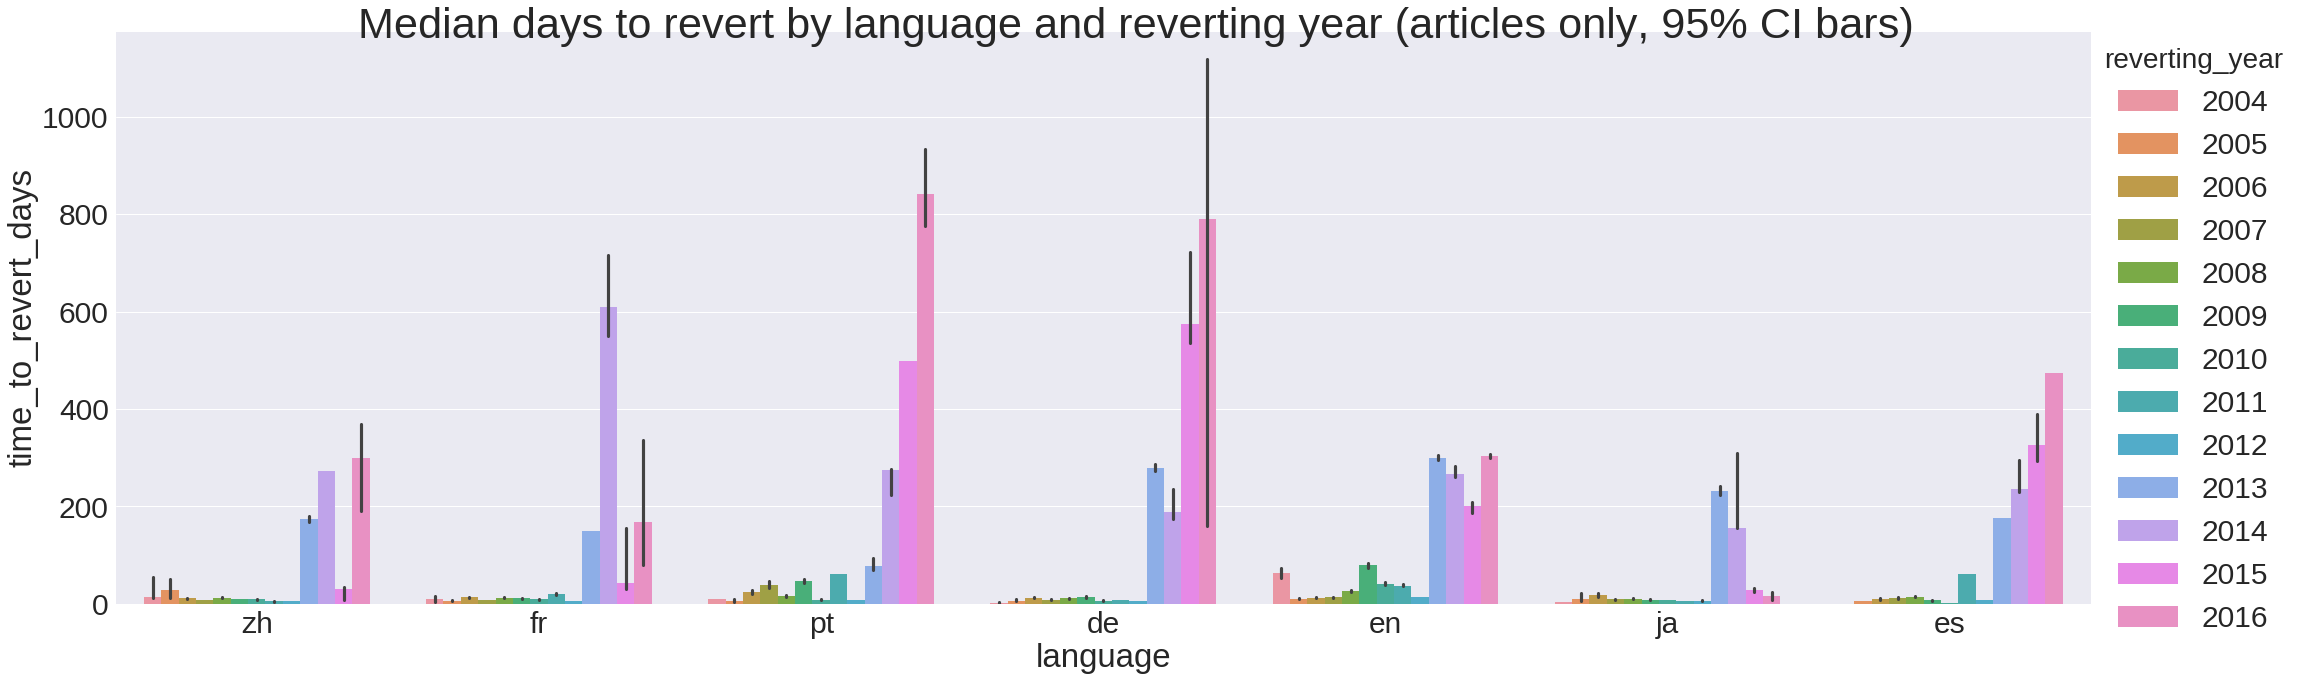

In [15]:
sns.set(font_scale=3)

g = sns.factorplot(data=df_all[df_all['page_namespace']==0],
                   x='language',
                   y='time_to_revert_days',
                   hue='reverting_year',
                   kind='bar',
                   estimator=np.median,                   
                   size=10,
                   aspect = 3)

plt.suptitle("Median days to revert by language and reverting year (articles only, 95% CI bars)")